<a href="https://colab.research.google.com/github/len-oks/Classificator_CHF/blob/main/%D0%92%D0%9A%D0%A0_%D0%BF%D0%BE%D0%B4_%D1%81%D1%82%D0%B0%D1%82%D1%8C%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install spectrochempy==0.6.7 pint==0.23 &>> output.log
exit()

In [2]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import spectrochempy as scp #нужен для MCR-ALS
from spectrochempy import NDDataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
my_set= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/poln_set.xlsx')

Mounted at /content/drive


In [4]:
y_plot = list(range(0, 50232, 184))
print(y_plot)
y_plot=np.asarray(y_plot)

[0, 184, 368, 552, 736, 920, 1104, 1288, 1472, 1656, 1840, 2024, 2208, 2392, 2576, 2760, 2944, 3128, 3312, 3496, 3680, 3864, 4048, 4232, 4416, 4600, 4784, 4968, 5152, 5336, 5520, 5704, 5888, 6072, 6256, 6440, 6624, 6808, 6992, 7176, 7360, 7544, 7728, 7912, 8096, 8280, 8464, 8648, 8832, 9016, 9200, 9384, 9568, 9752, 9936, 10120, 10304, 10488, 10672, 10856, 11040, 11224, 11408, 11592, 11776, 11960, 12144, 12328, 12512, 12696, 12880, 13064, 13248, 13432, 13616, 13800, 13984, 14168, 14352, 14536, 14720, 14904, 15088, 15272, 15456, 15640, 15824, 16008, 16192, 16376, 16560, 16744, 16928, 17112, 17296, 17480, 17664, 17848, 18032, 18216, 18400, 18584, 18768, 18952, 19136, 19320, 19504, 19688, 19872, 20056, 20240, 20424, 20608, 20792, 20976, 21160, 21344, 21528, 21712, 21896, 22080, 22264, 22448, 22632, 22816, 23000, 23184, 23368, 23552, 23736, 23920, 24104, 24288, 24472, 24656, 24840, 25024, 25208, 25392, 25576, 25760, 25944, 26128, 26312, 26496, 26680, 26864, 27048, 27232, 27416, 27600, 27784

In [5]:
x_plot=my_set['Волновое число']
x_plot=np.asarray(x_plot)
del my_set['Волновое число']

In [6]:

# Конвертация DataFrame в массив NumPy
array = my_set.T.values
# Инициализация NDDataset с массивом NumPy
nd_my_set = NDDataset(array)
nd_my_set.title = "Intensity, a.u"
nd_my_set.dims = ["y", "x"]

nd_my_set.set_coordset(x=x_plot,y=y_plot )
nd_my_set.x.title = "Wavenumber, 1/cm"
nd_my_set.y.title = "Intensity, a.u"

nd_my_set

name,NDDataset_3ee820c8
author,root@6e3e975fda06
created,2024-12-10 18:26:17+00:00
DATA,
title,"Intensity, a.u"
values,[[ 285.7 254.5 ... 481.2 238.2] [ 194.8 342.2 ... 235.1 491.6] ... [ 190.7 91.59 ... 135.6 139.3] [ 69.88 169.5 ... 421.9 322.7]]
shape,"(y:273, x:825)"
DIMENSION `x`,
size,825
title,"Wavenumber, 1/cm"
coordinates,[ 800.7 802.2 ... 1898 1899]


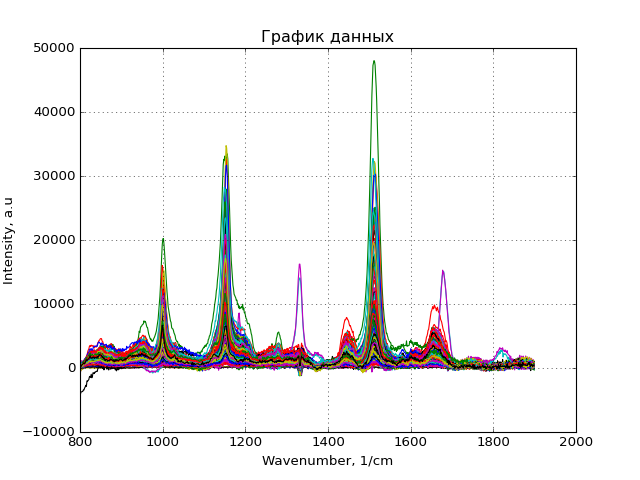

In [7]:
plt.clf()
plt.plot(x_plot, nd_my_set.T.values)
plt.title('График данных')
plt.xlabel('Wavenumber, 1/cm')
plt.ylabel('Intensity, a.u')
plt.grid(True)
plt.show()

<_Axes: xlabel='x', ylabel='values $\\mathrm{}$'>

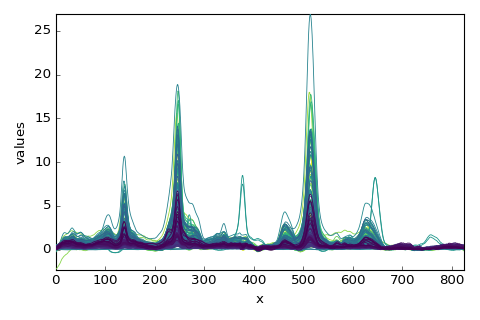

In [8]:
#фильтрация
nd_my_set = scp.savgol(nd_my_set, size=15, order=2)

# Нормировка SNV
my_set_f=nd_my_set.values
my_set_snv = my_set_f / np.std(my_set_f)
nd_my_set=NDDataset(my_set_snv)
nd_my_set.plot()


PC	Eigenvalue		%variance		%cumulative
  	 of cov(X)		   per PC		   variance
#1	 2.177e+01		   89.175		     89.175
#2	 5.572e+00		    5.843		     95.019
#3	 3.037e+00		    1.736		     96.755
#4	 2.242e+00		    0.946		     97.701
#5	 1.935e+00		    0.705		     98.406
#6	 1.440e+00		    0.390		     98.796
#7	 1.324e+00		    0.330		     99.126
#8	 1.006e+00		    0.191		     99.317



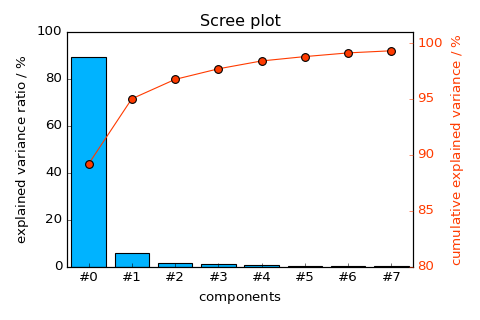

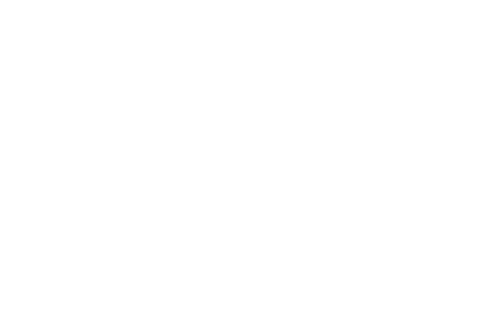

In [9]:
pca = scp.PCA(n_components=8)
pca.fit(nd_my_set)
pca.printev()
_ = pca.screeplot()


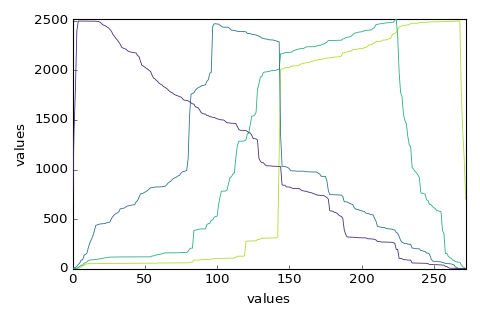

In [10]:
efa = scp.EFA()
efa.fit(nd_my_set)
efa.n_components = 4
C0 = efa.transform()
_ = C0.T.plot()

In [11]:
St0= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Спектральные профили.xlsx')
St0=St0.values
X=nd_my_set.values
mcr = scp.MCRALS(tol=0.1, log_level="INFO")
# Загрузите данные в объект MCR
mcr.fit(X, St0)

# Получите результаты MCR-ALS
concentrations = mcr.C.T
spectra = mcr.St

spectr_my_set = pd.DataFrame(spectra.T.values)
concent_my_set=pd.DataFrame(concentrations.T.values)

# Выведите результаты
#print("Матрица концентраций:")
#print(concent_my_set)

#print("Матрица спектральных профилей:")
#print(spectr_my_set)


#spectr_my_set.plot()
#concent_my_set.plot()

 Spectra profile initialized with 4 components
 Initial concentration profile computed
 ***           ALS optimisation log            ***
 #iter     RSE / PCA        RSE / Exp      %change
 -------------------------------------------------
   1        0.134728        0.170236      -82.976353
   2        0.133154        0.171246        0.593201
   3        0.131536        0.170144       -0.643713
   4        0.131322        0.170066       -0.046033
 converged !


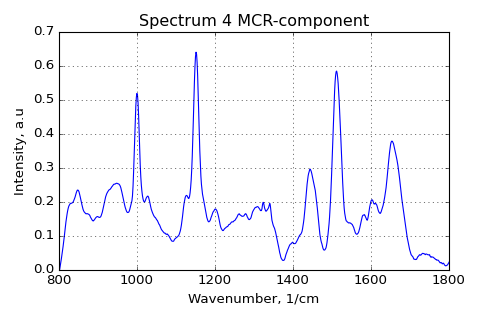

In [12]:
plt.clf()
plt.plot(x_plot, spectr_my_set[3])
plt.xlabel('Wavenumber, 1/cm')
plt.xlim(800, 1800)
plt.ylabel('Intensity, a.u')
plt.title('Spectrum 4 MCR-component')
plt.grid(True)
plt.show()

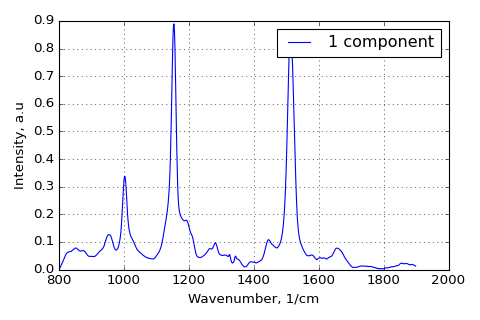

In [13]:
plt.clf()
plt.plot(x_plot, spectr_my_set[0])
plt.xlabel('Wavenumber, 1/cm')
plt.ylabel('Intensity, a.u')
plt.legend(['1 component', '2 component', '3 component', '4 component'])
plt.grid(True)
plt.show()

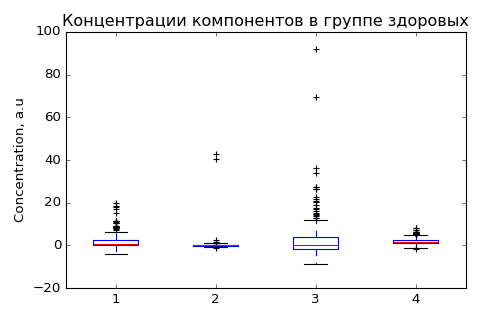

In [14]:
plt.clf()
plt.boxplot([concent_my_set[0], concent_my_set[1], concent_my_set[2], concent_my_set[3]])
plt.ylabel('Concentration, a.u')
plt.xticks([1, 2, 3, 4])
plt.title('Концентрации компонентов в группе здоровых')
plt.show()

In [15]:
conc_zdor=concent_my_set[0:80]
conc_xsn=concent_my_set[80:273]
conc_xsn

,0,1,2,3
80,5.130489,0.039580,5.501896,0.616279
81,8.032238,-0.360911,16.050517,0.377591
82,8.442824,0.089691,7.923952,0.321923
83,1.706073,0.090738,2.927996,0.648471
84,5.084866,0.015438,-0.764834,5.764943
...,...,...,...,...
268,0.603146,-0.175932,10.334394,2.691505
269,0.343430,-0.055271,6.486056,1.652725
270,0.651526,-0.203843,3.128089,1.619463
271,0.614207,-0.132103,2.955959,2.482934


In [16]:
conc_zdor_1=concent_my_set.iloc[0:80, 0:1]
conc_xsn_1=concent_my_set.iloc[80:273, 0:1]
conc_xsn_1

,0
80,5.130489
81,8.032238
82,8.442824
83,1.706073
84,5.084866
...,...
268,0.603146
269,0.343430
270,0.651526
271,0.614207


In [17]:
conc_zdor_12=concent_my_set.iloc[0:80, 0:2]
conc_xsn_12=concent_my_set.iloc[80:273, 0:2]
conc_xsn_12

,0,1
80,5.130489,0.039580
81,8.032238,-0.360911
82,8.442824,0.089691
83,1.706073,0.090738
84,5.084866,0.015438
...,...,...
268,0.603146,-0.175932
269,0.343430,-0.055271
270,0.651526,-0.203843
271,0.614207,-0.132103


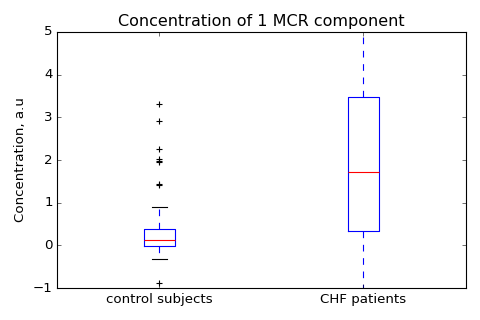

In [18]:
plt.clf()
plt.boxplot([conc_zdor[0], conc_xsn[0]])
plt.ylabel('Concentration, a.u')
plt.xticks([1, 2], ['control subjects','CHF patients'])
plt.ylim(-1, 5)
plt.title('Concentration of 1 MCR component')
plt.show()

РАЗБИЕНИЕ НА ТЕСТ И ТРЭЙН

In [19]:
X_c_train=pd.concat((conc_zdor[:65],conc_xsn[:155]))
y_c_train= np.repeat([0, 1], [65,155])
X_c_test=pd.concat((conc_zdor[66:],conc_xsn[156:]))
y_c_test= np.repeat([0, 1], [13,38])
X_c_train

,0,1,2,3
0,1.957186,-0.105647,2.182319,2.029361
1,2.023794,-0.317298,0.455084,3.393096
2,1.450177,-0.184635,1.048004,2.396804
3,2.256858,-0.415309,-0.727595,2.786697
4,2.907370,0.057941,6.609674,1.947964
...,...,...,...,...
230,0.158639,-0.060810,-1.038748,2.117062
231,-0.549050,-0.154151,-2.841914,4.024558
232,2.700248,-0.532646,36.342220,-0.115132
233,1.939090,-0.224478,21.800761,0.520500


In [20]:
X_c_train_1=pd.concat((conc_zdor_1[:65],conc_xsn_1[:155]))
y_c_train_1= np.repeat([0, 1], [65,155])
X_c_test_1=pd.concat((conc_zdor_1[66:],conc_xsn_1[156:]))
y_c_test_1= np.repeat([0, 1], [13,38])
X_c_train_1

,0
0,1.957186
1,2.023794
2,1.450177
3,2.256858
4,2.907370
...,...
230,0.158639
231,-0.549050
232,2.700248
233,1.939090


In [21]:
X_c_train_12=pd.concat((conc_zdor_12[:65],conc_xsn_12[:155]))
y_c_train_12= np.repeat([0, 1], [65,155])
X_c_test_12=pd.concat((conc_zdor_12[66:],conc_xsn_12[156:]))
y_c_test_12= np.repeat([0, 1], [13,38])
X_c_train_12

,0,1
0,1.957186,-0.105647
1,2.023794,-0.317298
2,1.450177,-0.184635
3,2.256858,-0.415309
4,2.907370,0.057941
...,...,...
230,0.158639,-0.060810
231,-0.549050,-0.154151
232,2.700248,-0.532646
233,1.939090,-0.224478


In [22]:
Q= nd_my_set.values
Q=pd.DataFrame(Q)
Q

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
0,0.118542,0.168371,0.218588,0.269192,0.320185,0.371565,0.423334,0.475490,0.548398,0.598080,...,0.289954,0.258171,0.240178,0.225752,0.212868,0.201528,0.191729,0.183473,0.176760,0.171589
1,0.164817,0.202387,0.243039,0.286773,0.333589,0.383488,0.436468,0.492530,0.551381,0.607735,...,0.230352,0.230777,0.198572,0.191793,0.187547,0.185833,0.186653,0.190005,0.195890,0.204308
2,0.045241,0.095594,0.144821,0.192922,0.239896,0.285744,0.330466,0.374062,0.414979,0.450711,...,0.181995,0.162393,0.154077,0.150070,0.148865,0.150462,0.154860,0.162060,0.172061,0.184864
3,0.054858,0.071880,0.094360,0.122297,0.155692,0.194544,0.238854,0.288621,0.350238,0.407311,...,0.162760,0.185970,0.176236,0.175423,0.175206,0.175587,0.176565,0.178141,0.180313,0.183083
4,0.122741,0.165350,0.209268,0.254495,0.301031,0.348876,0.398030,0.448492,0.522280,0.573525,...,0.225061,0.219770,0.218652,0.210196,0.203952,0.199920,0.198100,0.198492,0.201096,0.205912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.166557,0.212945,0.259835,0.307225,0.355116,0.403508,0.452400,0.501794,0.547749,0.609465,...,0.284037,0.258320,0.242735,0.231914,0.219013,0.204033,0.186974,0.167836,0.146618,0.123321
269,0.042649,0.083590,0.123782,0.163224,0.201917,0.239860,0.277053,0.313498,0.356736,0.391473,...,0.184123,0.171213,0.153055,0.143316,0.134408,0.126333,0.119089,0.112677,0.107097,0.102349
270,0.044812,0.082944,0.119563,0.154669,0.188263,0.220344,0.250912,0.279968,0.295158,0.325010,...,0.186858,0.189044,0.183421,0.182838,0.180732,0.177102,0.171948,0.165270,0.157068,0.147343
271,0.060330,0.097627,0.134372,0.170566,0.206208,0.241298,0.275836,0.309823,0.348005,0.377168,...,0.210403,0.194387,0.189413,0.180033,0.167214,0.150956,0.131260,0.108124,0.081550,0.051537


In [23]:
X_s_train=pd.concat((Q[0:65],Q[80:235]))
y_s_train= np.repeat([0, 1], [65,155])
X_s_test=pd.concat((Q[66:79],Q[236:]))
y_s_test= np.repeat([0, 1], [13,37])
X_s_train

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
0,0.118542,0.168371,0.218588,0.269192,0.320185,0.371565,0.423334,0.475490,0.548398,0.598080,...,0.289954,0.258171,0.240178,0.225752,0.212868,0.201528,0.191729,0.183473,0.176760,0.171589
1,0.164817,0.202387,0.243039,0.286773,0.333589,0.383488,0.436468,0.492530,0.551381,0.607735,...,0.230352,0.230777,0.198572,0.191793,0.187547,0.185833,0.186653,0.190005,0.195890,0.204308
2,0.045241,0.095594,0.144821,0.192922,0.239896,0.285744,0.330466,0.374062,0.414979,0.450711,...,0.181995,0.162393,0.154077,0.150070,0.148865,0.150462,0.154860,0.162060,0.172061,0.184864
3,0.054858,0.071880,0.094360,0.122297,0.155692,0.194544,0.238854,0.288621,0.350238,0.407311,...,0.162760,0.185970,0.176236,0.175423,0.175206,0.175587,0.176565,0.178141,0.180313,0.183083
4,0.122741,0.165350,0.209268,0.254495,0.301031,0.348876,0.398030,0.448492,0.522280,0.573525,...,0.225061,0.219770,0.218652,0.210196,0.203952,0.199920,0.198100,0.198492,0.201096,0.205912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.100860,0.148662,0.193747,0.236115,0.275766,0.312700,0.346916,0.378416,0.411990,0.427797,...,0.255238,0.237300,0.224087,0.220240,0.214916,0.208114,0.199835,0.190079,0.178845,0.166133
231,0.126147,0.159001,0.193415,0.229389,0.266923,0.306016,0.346670,0.388884,0.423571,0.479925,...,0.203230,0.193199,0.178040,0.176308,0.176367,0.178216,0.181855,0.187285,0.194506,0.203518
232,0.063733,0.110536,0.158150,0.206575,0.255811,0.305858,0.356715,0.408384,0.473376,0.532207,...,0.233806,0.200609,0.193075,0.186685,0.182966,0.181918,0.183541,0.187835,0.194800,0.204436
233,0.087781,0.115653,0.144496,0.174310,0.205095,0.236850,0.269577,0.303274,0.343829,0.381085,...,0.130962,0.132506,0.127578,0.124931,0.122375,0.119910,0.117536,0.115254,0.113063,0.110962


РЕАЛИЗАЦИЯ PLS-DA


Средняя квадратичная ошибка: 0.054676873326315024
F1 : 0.7158166667031445


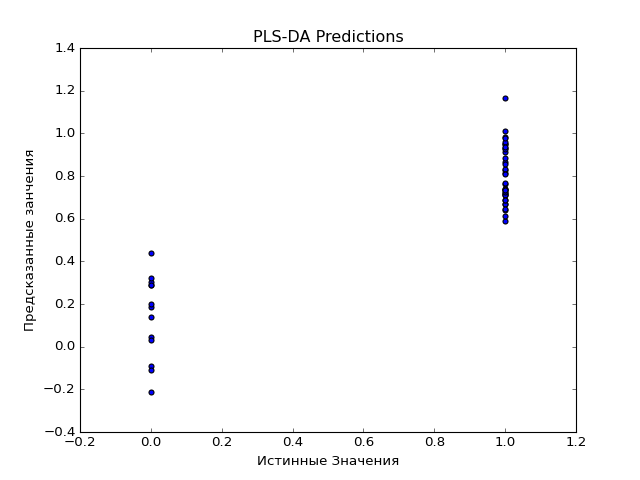

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_curve, auc
#Подготовка данных для PLS-DA
pls_da = PLSRegression(n_components=5)
pls_da.fit(X_s_train, y_s_train)

#Прогнозирование Y_test по X_test
y_pred = pls_da.predict(X_s_test)

#Оценка производительности модели
mse = mean_squared_error(y_s_test, y_pred)
print(f'Средняя квадратичная ошибка: {mse}')
print(f'F1 : {pls_da.score(X_s_test, y_s_test)}')


#Вывод результатов на график
plt.clf()
plt.scatter(y_s_test, y_pred)
plt.xlabel('Истинные Значения')
plt.ylabel('Предсказанные занчения')
plt.title('PLS-DA Predictions')
plt.show()

In [25]:
x_scor=[-15 + i*0.136 for i in range(int(30/0.136))]
print(len(x_scor))

220


In [26]:
Q=nd_my_set[1:3].values
y_pred = pls_da.predict(Q)
y_pred_binary = np.where(y_pred >= 0.65, 1, 0)
print(f'Предсказанный класс: {y_pred_binary}')

Предсказанный класс: [       1        1]


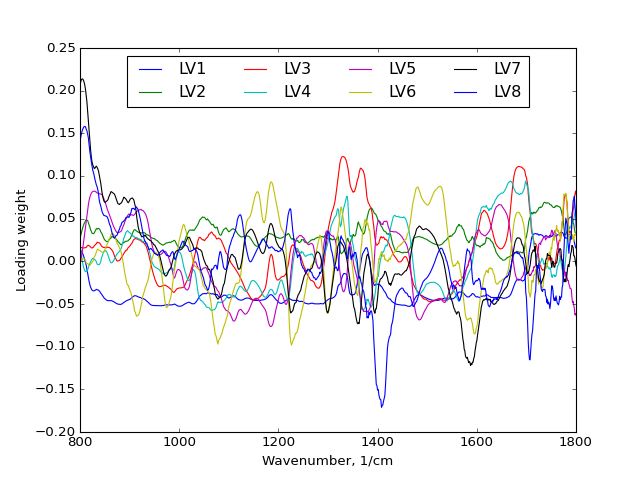

In [118]:
# Получение лоадингов и скоров
loading_weights = pls_da.x_loadings_

# Вывод лоадингов на график
plt.figure()
#plt.title('3 Loading weights')
plt.plot(x_plot, loading_weights)
plt.xlabel('Wavenumber, 1/cm')
plt.ylabel('Loading weight')
plt.xlim(800, 1800)

plt.legend(['LV1','LV2','LV3','LV4', 'LV5','LV6','LV7','LV8'], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4)

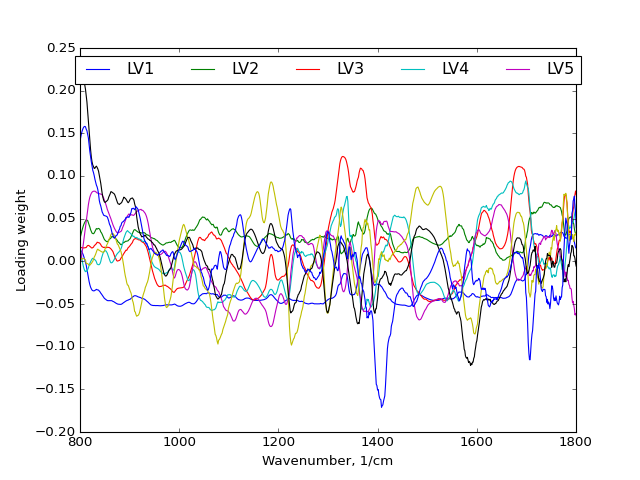

In [119]:
# Получение лоадингов и скоров
loading_weights = pls_da.x_loadings_

# Вывод лоадингов на график
plt.figure()
#plt.title('3 Loading weights')
plt.plot(x_plot, loading_weights)
plt.xlabel('Wavenumber, 1/cm')
plt.ylabel('Loading weight')
plt.xlim(800, 1800)
plt.legend(['LV1','LV2','LV3','LV4', 'LV5'], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)

In [31]:
loading_weights = pls_da.x_loadings_
loading_weights

array([[ 0.01271,  0.02842,  0.01645],
       [ 0.01221,  0.03221,  0.01617],
       ...,
       [ 0.01812,  0.05826, -0.02199],
       [ 0.01842,  0.05275, -0.01877]])

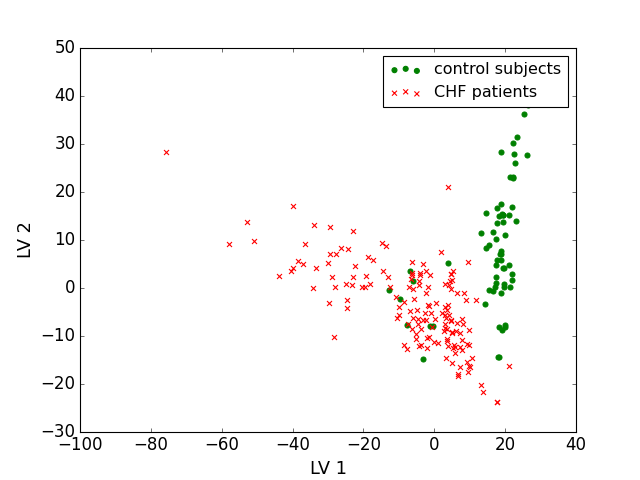

In [28]:
scores = pls_da.x_scores_
score1_healthy = scores[0:65,0]
score2_healthy = scores[0:65,1]
score3_healthy = scores[0:65,2]

score1_sick = scores[66:220,0]
score2_sick = scores[66:220,1]
score3_sick = scores[66:220,2]


# Вывод скоров на график
plt.figure()
plt.scatter(score1_healthy, score2_healthy, color='green', marker='o', label='control subjects')
plt.scatter(score1_sick, score2_sick, color='red', marker='x', label='CHF patients')
plt.xlabel('LV 1', fontsize=16)
plt.ylabel('LV 2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In [37]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):

    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)

        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/n_comp
        # Trick to update status on the same line
        #std.write("\r%d%% completed" % comp)
        #std.flush()
        #std.write("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    #std.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.clf()
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            #plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components', fontsize=14)
            plt.ylabel('MSE', fontsize=14)
            plt.xlim(left=1)

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=n_comp)

    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)



    return

Suggested number of components:  3


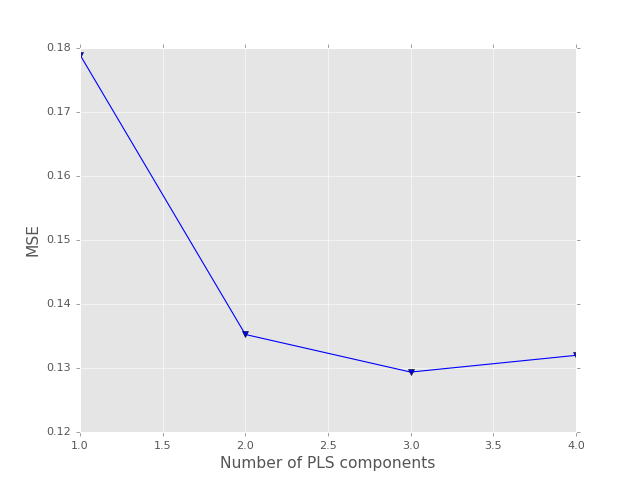

 ERROR | NameError: name 'r2_score' is not defined


In [58]:
optimise_pls_cv(X_s_train,y_s_train, 5, plot_components=True)

In [73]:
def pls_da(X_train,y_train, X_test):

    # Define the PLS object for binary classification
    plsda = PLSRegression(n_components=3)

    # Fit the training set
    plsda.fit(X_train, y_train)

    y_pred = plsda.predict(X_test)

    # Применяем пороговое значение 0.5
    y_pred_binary = np.where(y_pred >= 0.65, 1, 0)

    return y_pred_binary

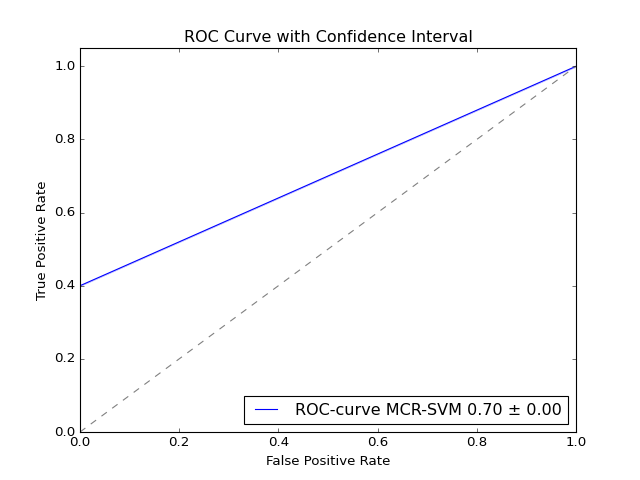

In [76]:
y_c= np.repeat([0, 1], [80,193])
X_c=np.vstack((conc_zdor.values, conc_xsn.values))

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Списки для хранения значений TPR и FPR
tpr_list = []
fpr_list = []
roc_auc_list = []

for train_index, test_index in cv.split(X_c, y_c):
    X_train, X_test = X_c[train_index], X_c[test_index]
    y_train, y_test = y_c[train_index], y_c[test_index]

    y_res = pls_da(X_c[train,:], y_c[train], X_c[test,:])

    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_c[test],  y_res)
    roc_auc = auc(fpr, tpr)

    # Сохранение результатов
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Вычисление среднего значения TPR для построения ROC-кривой
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
mean_auc = np.mean(roc_auc_list)
std_auc = np.std(roc_auc_list)

# Вычисление доверительного интервала
std_tpr = np.std([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
tprs_upper = np.clip(mean_tpr + 1.96 * std_tpr / np.sqrt(len(tpr_list)), 0, 1)
tprs_lower = np.clip(mean_tpr - 1.96 * std_tpr / np.sqrt(len(tpr_list)), 0, 1)

# Построение ROC-кривой
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'ROC-curve MCR-SVM {mean_auc:.2f} ± {std_auc:.2f}')
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Confidence Interval')
plt.legend(loc='lower right')
plt.show()

In [77]:
std_auc

0.0

In [60]:
y_c= np.repeat([0, 1], [80,193])
X_c=np.vstack((conc_zdor.values, conc_xsn.values))
accuracy = []
cval = KFold(n_splits=10, shuffle=True, random_state=19)
for train, test in cval.split(X_c):

    y_res = pls_da(X_c[train,:], y_c[train], X_c[test,:])

    accuracy.append(accuracy_score(y_c[test], y_res))

print("Average accuracy on 10 splits: ", np.array(accuracy).mean())

Average accuracy on 10 splits:  0.7071428571428571


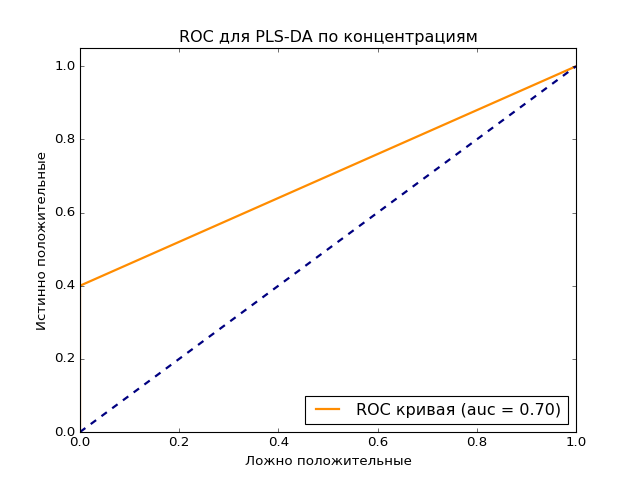

In [41]:
fpr, tpr, _ = roc_curve(y_c[test], y_res)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
plt.title('ROC для PLS-DA по концентрациям')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.to_excel('/content/drive/MyDrive/Colab Notebooks/y_pred.xlsx')

In [95]:
def pls_da(X_train,y_train, X_test):

    # Define the PLS object for binary classification
    plsda = PLSRegression(n_components=3)

    # Fit the training set
    plsda.fit(X_train, y_train)

    y_pred = plsda.predict(X_test)

    # Применяем пороговое значение 0.5
    y_pred_binary = np.where(y_pred >= 0.65, 1, 0)

    return y_pred_binary

 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING | (UndefinedMetricWarning) No negative samples in y_true, false positive value should be meaningless
 WARNING |

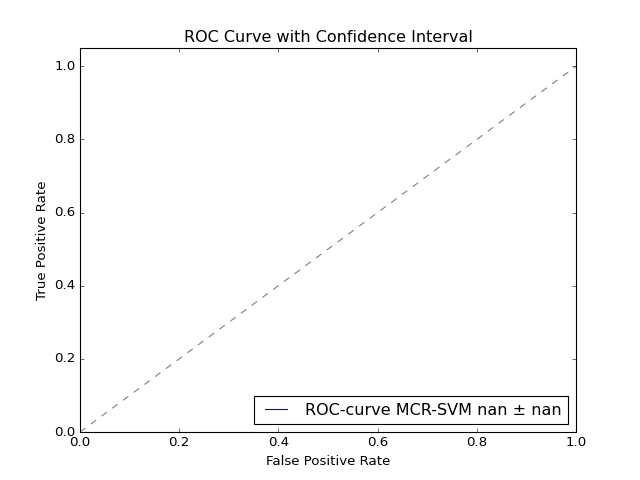

In [94]:
y_s= np.repeat([0, 1], [80,193])
X_s=np.vstack(nd_my_set.values)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Списки для хранения значений TPR и FPR
tpr_list = []
fpr_list = []
roc_auc_list = []

for train_index, test_index in cv.split(X_s, y_s):
    X_train, X_test = X_s[train_index], X_s[test_index]
    y_train, y_test = y_s[train_index], y_s[test_index]

    y_res = pls_da(X_s[train,:], y_s[train], X_s[test,:])

    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_s[test],  y_res)
    roc_auc = auc(fpr, tpr)

    # Сохранение результатов
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Вычисление среднего значения TPR для построения ROC-кривой
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
mean_auc = np.mean(roc_auc_list)
std_auc = np.std(mean_tpr)

# Вычисление доверительного интервала
std_tpr = np.std([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
tprs_upper = np.clip(mean_tpr + 1.96 * std_tpr / np.sqrt(len(tpr_list)), 0, 1)
tprs_lower = np.clip(mean_tpr - 1.96 * std_tpr / np.sqrt(len(tpr_list)), 0, 1)

# Построение ROC-кривой
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'ROC-curve MCR-SVM {mean_auc:.2f} ± {std_auc:.2f}')
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Confidence Interval')
plt.legend(loc='lower right')
plt.show()

In [84]:
std_auc


1.1102230246251565e-16

In [96]:
y_s= np.repeat([0, 1], [80,193])
X_s=np.vstack(nd_my_set.values)

accuracy = []
cval = KFold(n_splits=3, shuffle=True, random_state=19)
for train, test in cval.split(X_s_train):

    y_res = pls_da(X_s[train,:], y_s[train], X_s[test,:])

    accuracy.append(accuracy_score(y_s[test], y_res))

print("Average accuracy on 10 splits: ", np.array(accuracy).mean())

Average accuracy on 10 splits:  0.9273108725163519


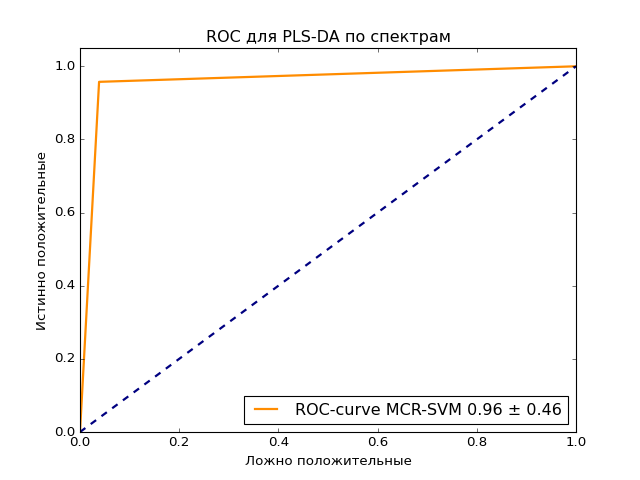

In [101]:
fpr, tpr, _ = roc_curve(y_s[test], y_res)
roc_auc = auc(fpr, tpr)
std_auc = np.std(tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-curve MCR-SVM {roc_auc:.2f} ± {std_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
plt.title('ROC для PLS-DA по спектрам')
plt.legend(loc="lower right")
plt.show()

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

 WARNING | (UndefinedMetricWarning) Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 WARNING | (UndefinedMetricWarning) Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 WARNING | (UndefinedMetricWarning) Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.75      1.00      0.85        38

    accuracy                           0.75        51
   macro avg       0.37      0.50      0.43        51
weighted avg       0.56      0.75      0.64        51



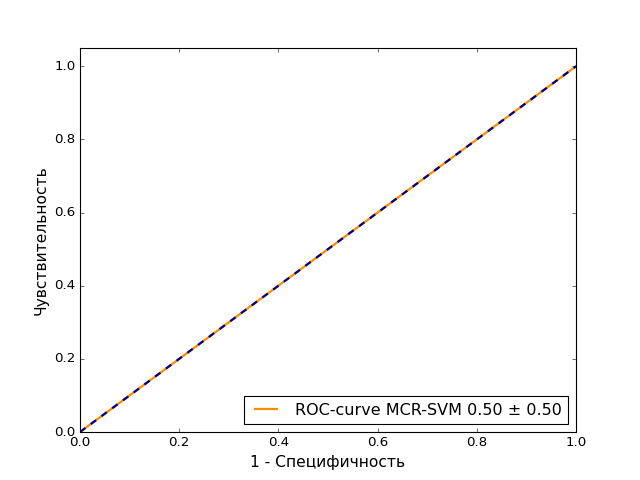

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_c_train_12, y_c_train_12)

#Предсказание на тестовой выборке
y_pred = model.predict(X_c_test_12)

#Оценка качества модели
accuracy_log = model.score(X_c_test_12, y_c_test_12)
print(classification_report(y_c_test_12, y_pred))

# Строим ROC-кривую
fpr_lr, tpr_lr, _ = roc_curve(y_c_test_12, y_pred)
roc_auc_log = auc(fpr_lr, tpr_lr)
std_auc_log = np.std(tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC-curve MCR-LR {roc_auc_log:.2f} ± {std_auc_log:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Специфичность', fontsize=14)
plt.ylabel('Чувствительность', fontsize=14)
#plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [46]:
y_pred

array([       1,        1, ...,        1,        1])

SVM


In [47]:
y_c= np.repeat([0, 1], [80,193])
X_c=np.vstack((conc_zdor.values, conc_xsn.values))

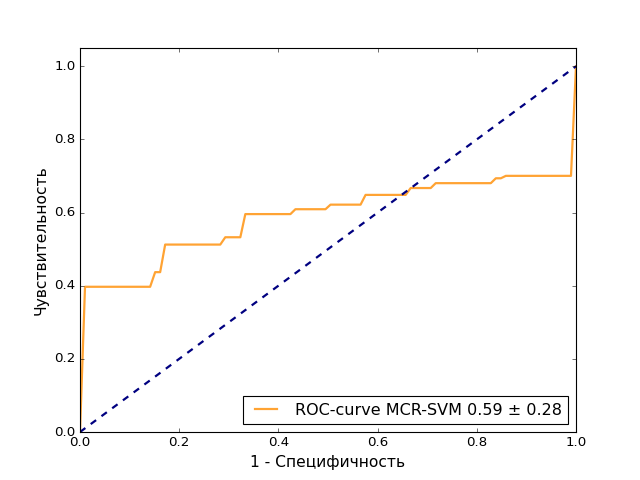

Test Accuracy: 0.71


In [104]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score

y_c= np.repeat([0, 1], [80,193])
X_c=np.vstack((conc_zdor_12.values, conc_xsn_12.values))

# Разбиение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# Определение SVM модели
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Кросс-валидация
cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    svm_model.fit(X_train[train], y_train[train])
    viz = roc_curve(y_train[test], svm_model.predict_proba(X_train[test])[:, 1])
    interp_tpr = np.interp(mean_fpr, viz[0], viz[1])
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    roc_auc = auc(viz[0], viz[1])
    aucs.append(roc_auc)
    #ax.plot(viz[0], viz[1], label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

# Тестирование модели
y_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Средняя ROC кривая
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='darkorange',
        label=f'ROC-curve MCR-SVM {mean_auc:.2f} ± {std_auc:.2f}',
        lw=2, alpha=.8)

# Настройка графика
ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.legend(loc="lower right")
plt.xlabel('1 - Специфичность', fontsize=14)
plt.ylabel('Чувствительность', fontsize=14)
plt.show()

print(f'Test Accuracy: {test_accuracy:.2f}')

In [86]:
std_auc

0.27530513020641395

In [49]:
from scipy import stats
import scipy.stats as stats

#perform the Mann-Whitney U test
#stats. mannwhitneyu (roc_auc, mean_auc, alternative='two-sided')

t_statistic, p_value = stats. mannwhitneyu(roc_auc_pls1, mean_auc)

if p_value < 0.05:
    print("Различие в точности моделей статистически значимо")
else:
    print("Различие в точности моделей не является статистически значимым")
p_value

 ERROR | NameError: name 'roc_auc_pls1' is not defined


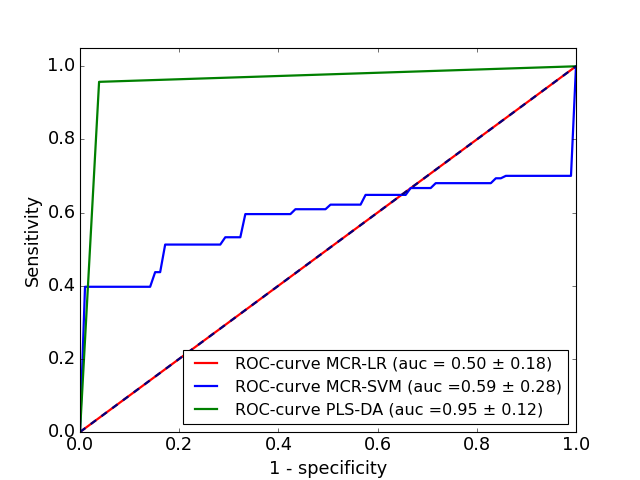

In [106]:


plt.figure()
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'ROC-curve MCR-LR (auc = {roc_auc_log:.2f} ± {0.18})')
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC-curve MCR-SVM (auc ={mean_auc:.2f} ± {std_auc:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC-curve PLS-DA (auc ={0.95} ± {0.12})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificity', fontsize=16)
plt.ylabel('Sensitivity', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

PLS+SVM

In [123]:
from sklearn.pipeline import make_pipeline

# Создание пайплайна PLS + SVM
pls_svm_pipeline = make_pipeline(PLSRegression(n_components=3), SVC(kernel='linear'))

# Обучение модели
pls_svm_pipeline.fit(X_s_train, y_s_train)

# Прогнозирование на тестовой выборке
y_pred = pls_svm_pipeline.predict(X_s_test)

# Преобразование предсказаний в бинарный формат
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))

 ERROR | ValueError: Found array with dim 3. SVC expected <= 2.
